# Features retrieval

## Instruments used

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import re
import pickle
from os import path, listdir
from essentia.standard import MonoLoader, OnsetDetection
from essentia.standard import Energy, ZeroCrossingRate
from essentia.standard import FFT, Centroid, Spectrum, CentralMoments, DistributionShape, Windowing
from IPython.display import Audio
from ipywidgets import FloatProgress
from matplotlib.colors import ListedColormap
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Theory used

### FFT
### Windowing
### Central Moments
### Centroid
### Variance, skewness and kurtosis

## The data

Let's separete a very small set from the training to find the features we need to use. First, we need to convert .wav to a numeric array. From the kind authors of the dataset we know the beatrate, it's set to ```fr``` variable.

In [2]:
fr = 44100.0
list_of_files = listdir(path.join(path.abspath(path.curdir), 'MusicExamples'))
list_of_inst = ['cel', 'cla', 'flu', 'gac', 'gel', 'org', 'pia', 'sax', 'tru', 'vio']

In [3]:
cel_ptn = re.compile('^\[cel\]')
cla_ptn = re.compile('^\[cla\]')
flu_ptn = re.compile('^\[flu\]')
gac_ptn = re.compile('^\[gac\]')
gel_ptn = re.compile('^\[gel\]')
org_ptn = re.compile('^\[org\]')
pia_ptn = re.compile('^\[pia\]')
sax_ptn = re.compile('^\[sax\]')
tru_ptn = re.compile('^\[tru\]')
vio_ptn = re.compile('^\[vio\]')

cel = []
cla = []
flu = []
gac = []
gel = []
org = []
pia = []
sax = []
tru = []
vio = []

for filename in list_of_files:
    if re.match(cel_ptn, filename):
        cel.append(MonoLoader(filename=path.join(path.abspath(path.curdir), 'MusicExamples', filename))())
    if re.match(cla_ptn, filename):
        cla.append(MonoLoader(filename=path.join(path.abspath(path.curdir), 'MusicExamples', filename))())
    if re.match(flu_ptn, filename):
        flu.append(MonoLoader(filename=path.join(path.abspath(path.curdir), 'MusicExamples', filename))())
    if re.match(gac_ptn, filename):
        gac.append(MonoLoader(filename=path.join(path.abspath(path.curdir), 'MusicExamples', filename))())
    if re.match(gel_ptn, filename):
        gel.append(MonoLoader(filename=path.join(path.abspath(path.curdir), 'MusicExamples', filename))())
    if re.match(org_ptn, filename):
        org.append(MonoLoader(filename=path.join(path.abspath(path.curdir), 'MusicExamples', filename))())
    if re.match(pia_ptn, filename):
        pia.append(MonoLoader(filename=path.join(path.abspath(path.curdir), 'MusicExamples', filename))())
    if re.match(sax_ptn, filename):
        sax.append(MonoLoader(filename=path.join(path.abspath(path.curdir), 'MusicExamples', filename))())
    if re.match(tru_ptn, filename):
        tru.append(MonoLoader(filename=path.join(path.abspath(path.curdir), 'MusicExamples', filename))())
    if re.match(vio_ptn, filename):
        vio.append(MonoLoader(filename=path.join(path.abspath(path.curdir), 'MusicExamples', filename))())

Let's look a little at what we got

In [4]:
print len(tru[0][:-1])
print tru[1][-100:]

132298
[ 0.04724265  0.05383465  0.06166265  0.06964324  0.07571642  0.07896665
  0.07866146  0.0746025   0.06825465  0.06016725  0.05041658  0.04054384
  0.03155614  0.02429273  0.01892148  0.01399274  0.00967437  0.00633259
  0.00274667 -0.00027467 -0.00282296 -0.0069277  -0.0117954  -0.01745659
 -0.02659688 -0.03881954 -0.05377362 -0.07271035 -0.09361553 -0.11378826
 -0.13139744 -0.14300974 -0.14664143 -0.14194158 -0.12822351 -0.10718101
 -0.08163701 -0.0535905  -0.02644429 -0.00265511  0.01777703  0.0339671
  0.0450911   0.05165258  0.05334635  0.05020295  0.04330577  0.03323466
  0.02064577  0.00622578 -0.00973541 -0.02624592 -0.04161199 -0.05482651
 -0.06537065 -0.0728019  -0.07673879 -0.07710502 -0.07438887 -0.06953642
 -0.06346324 -0.05742057 -0.05323954 -0.05223243 -0.05421613 -0.05882443
 -0.06640828 -0.07599109 -0.08606219 -0.09677419 -0.10805078 -0.11893064
 -0.12929167 -0.138493   -0.14406262 -0.14291817 -0.13235877 -0.11197241
 -0.08478042 -0.05439924 -0.02433851  0.00131

Next, let's look at the waveform of out samples.

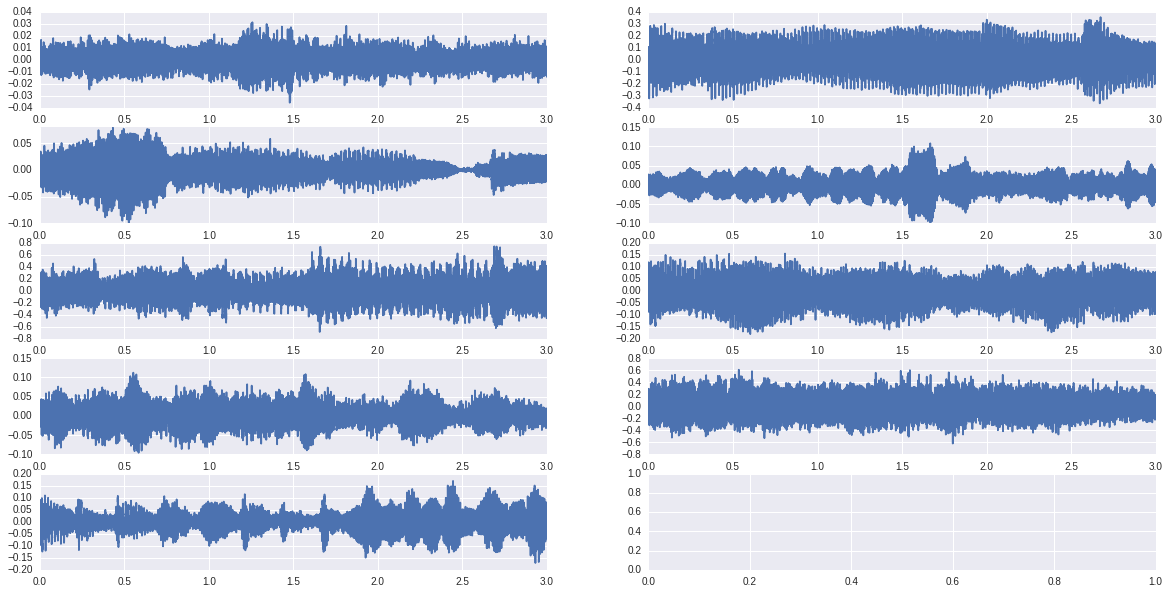

In [5]:
timeline = np.arange(len(cla[0])) / fr

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(20, 10))
axlist = [x for ax in axes for x in ax]

for audio, ax in zip(cel, axlist):
    ax.plot(timeline, audio)
    
plt.show()

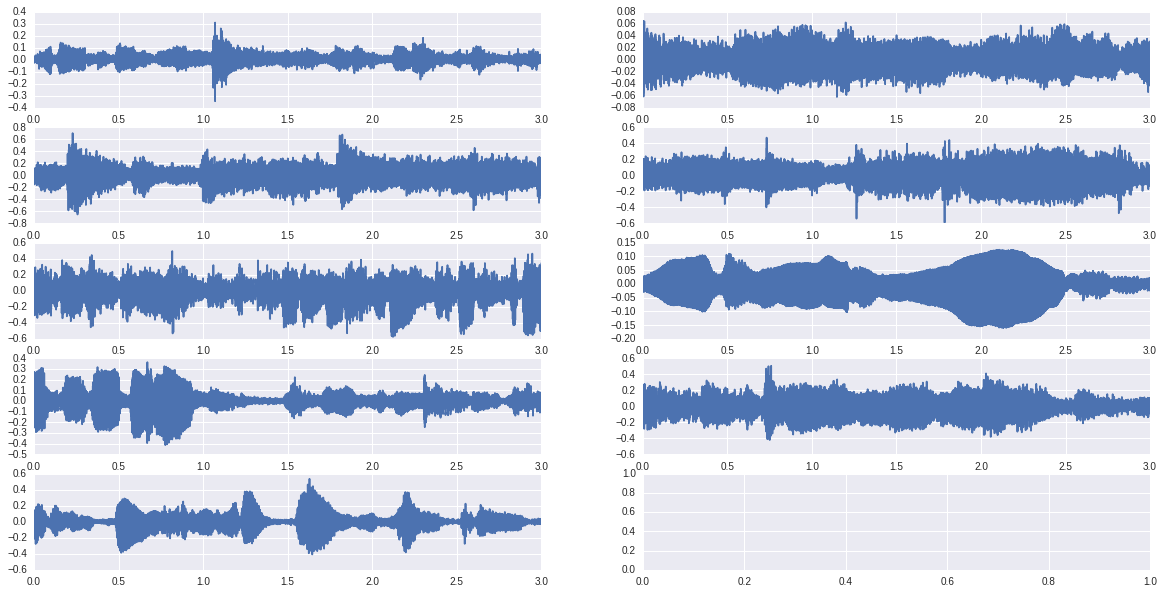

In [6]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(20, 10))
axlist = [x for ax in axes for x in ax]

for audio, ax in zip(cla, axlist):
    ax.plot(timeline, audio)

plt.show()

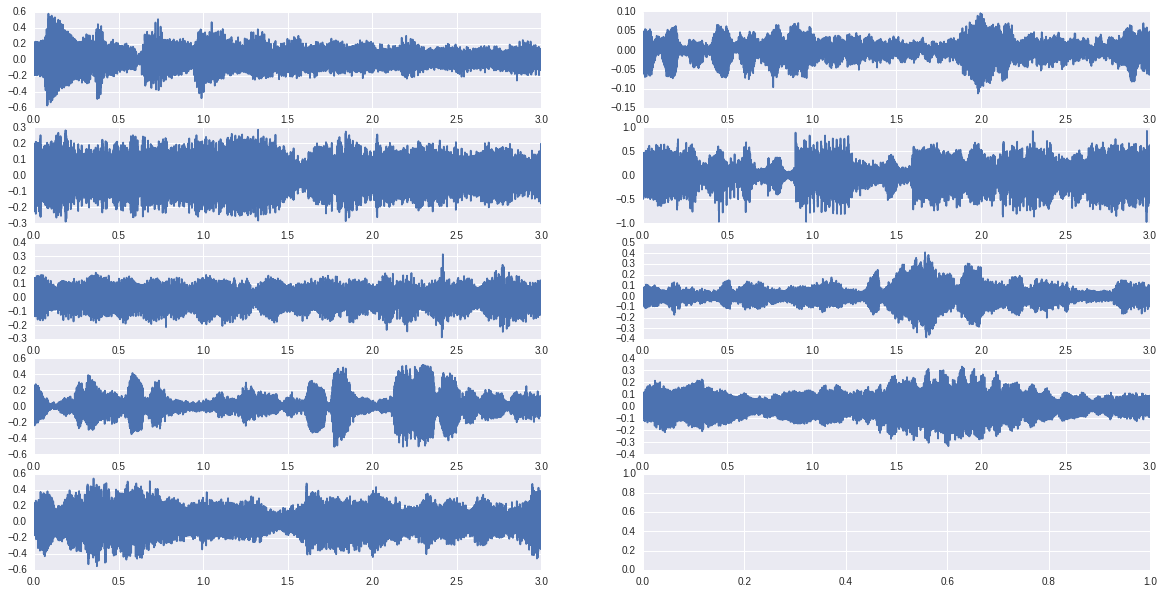

In [7]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(20, 10))
axlist = [x for ax in axes for x in ax]

for audio, ax in zip(flu, axlist):
    ax.plot(timeline, audio)
    
plt.show()

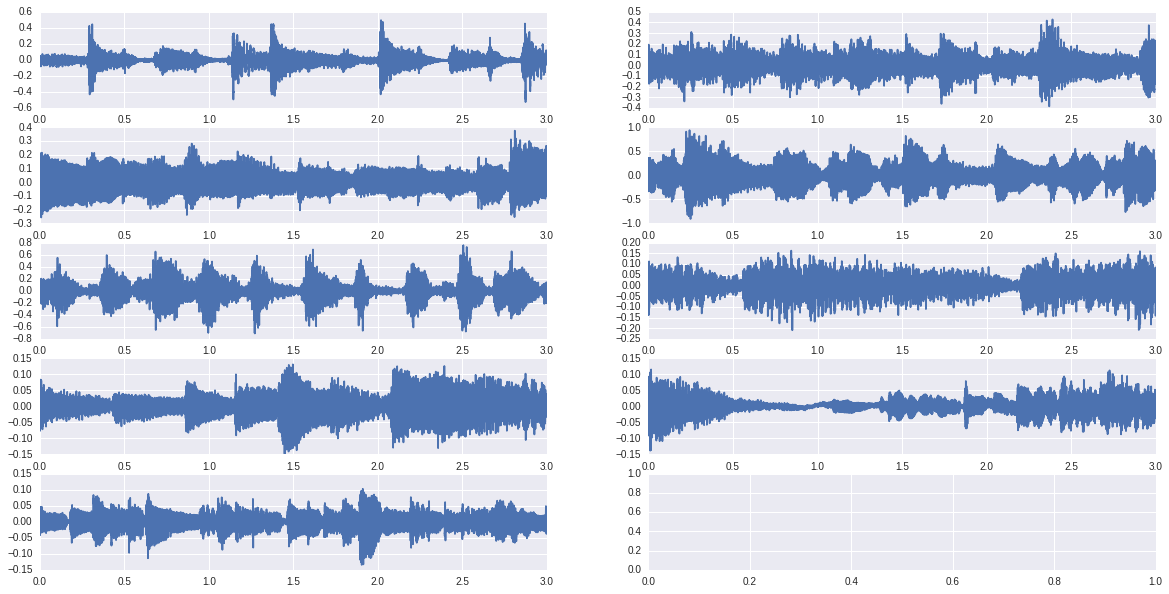

In [8]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(20, 10))
axlist = [x for ax in axes for x in ax]

for audio, ax in zip(gac, axlist):
    ax.plot(timeline, audio)
    
plt.show()

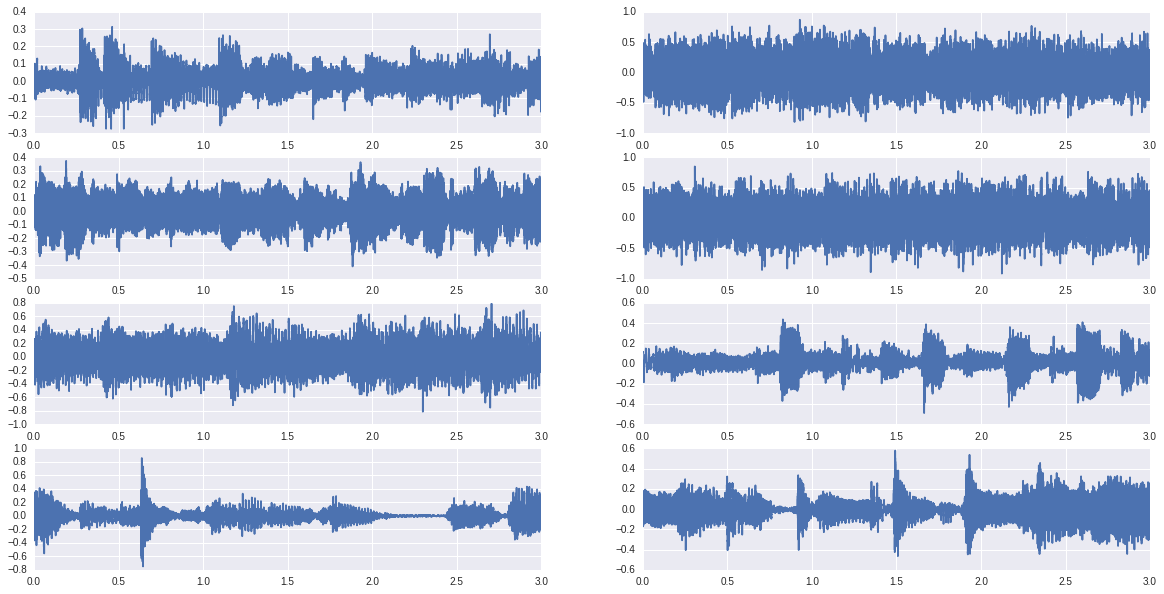

In [9]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 10))
axlist = [x for ax in axes for x in ax]

for audio, ax in zip(gel, axlist):
    ax.plot(timeline, audio)
    
plt.show()

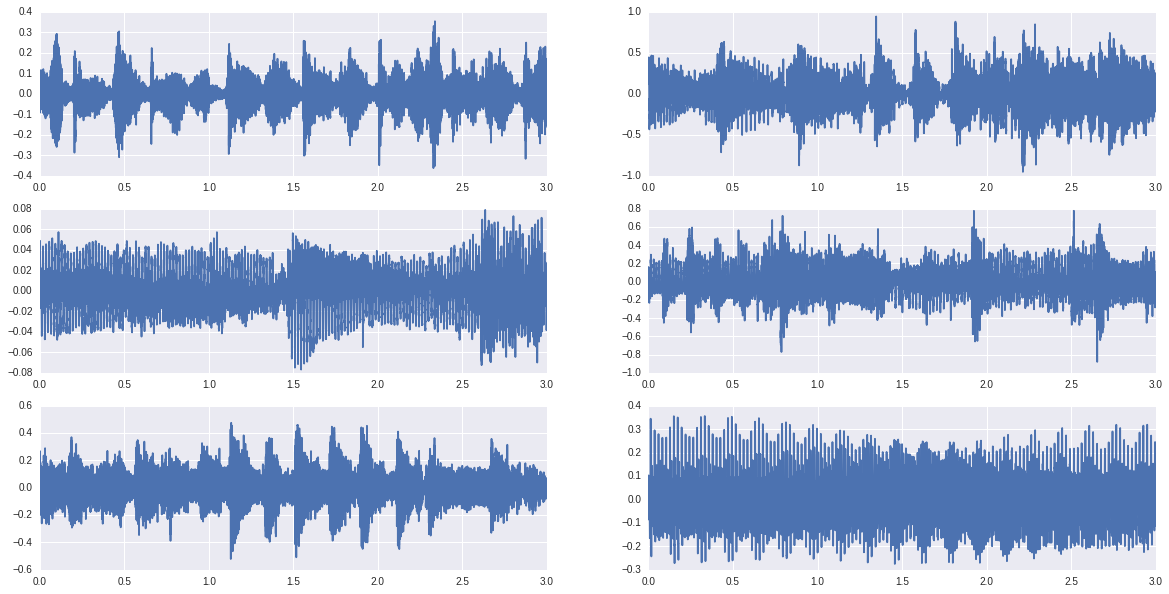

In [10]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 10))
axlist = [x for ax in axes for x in ax]

for audio, ax in zip(org, axlist):
    ax.plot(timeline, audio)
    
plt.show()

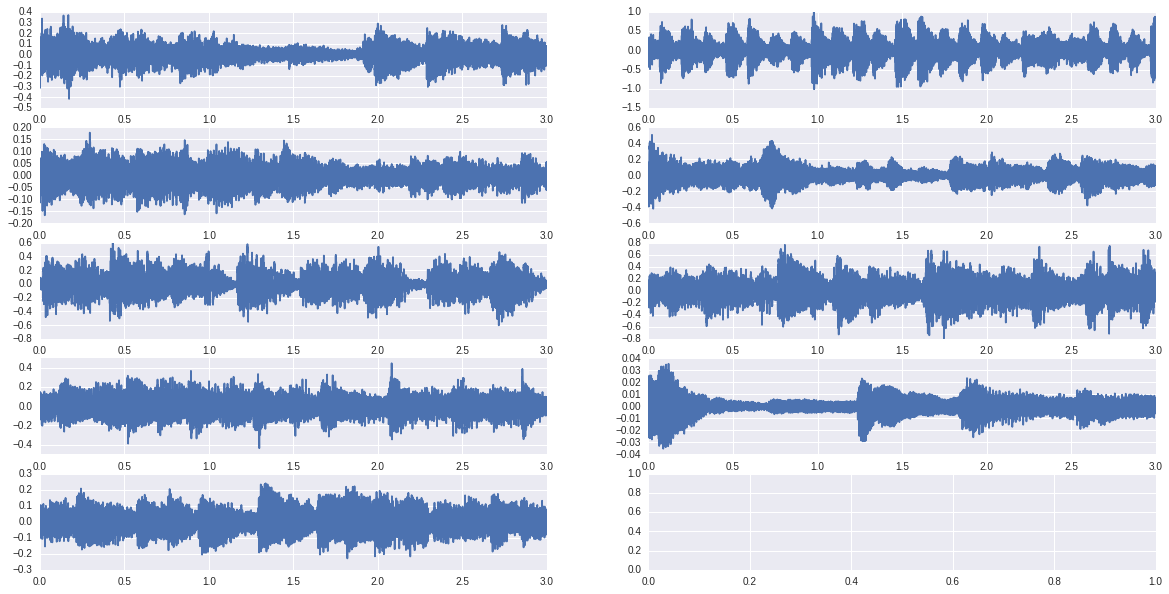

In [11]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(20, 10))
axlist = [x for ax in axes for x in ax]

for audio, ax in zip(pia, axlist):
    ax.plot(timeline, audio)
    
plt.show()

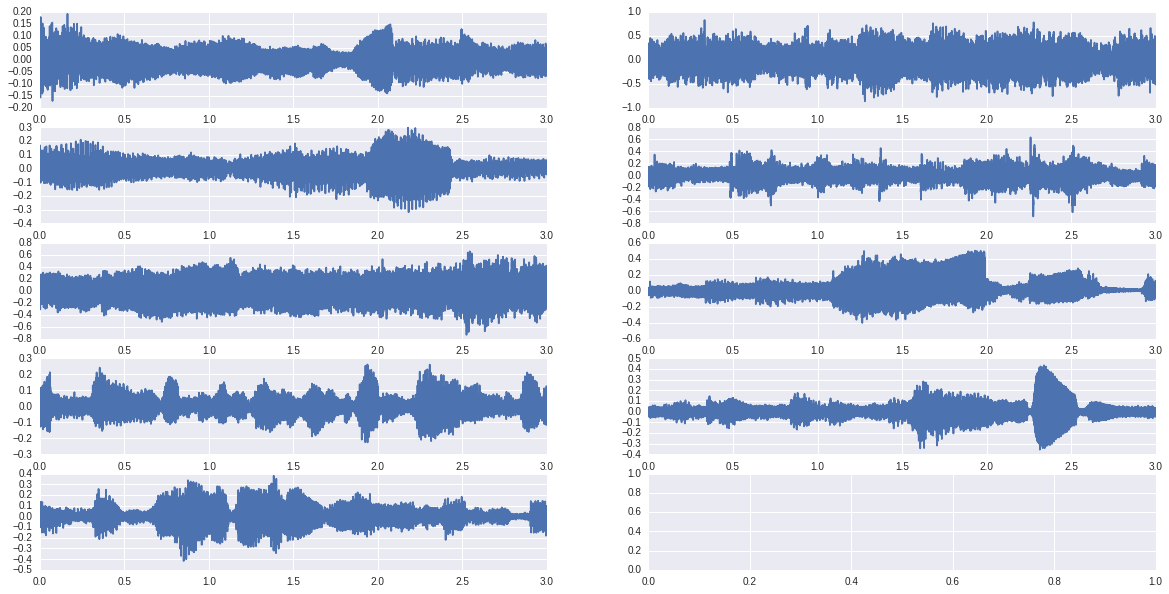

In [12]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(20, 10))
axlist = [x for ax in axes for x in ax]

for audio, ax in zip(sax, axlist):
    ax.plot(timeline, audio)
    
plt.show()

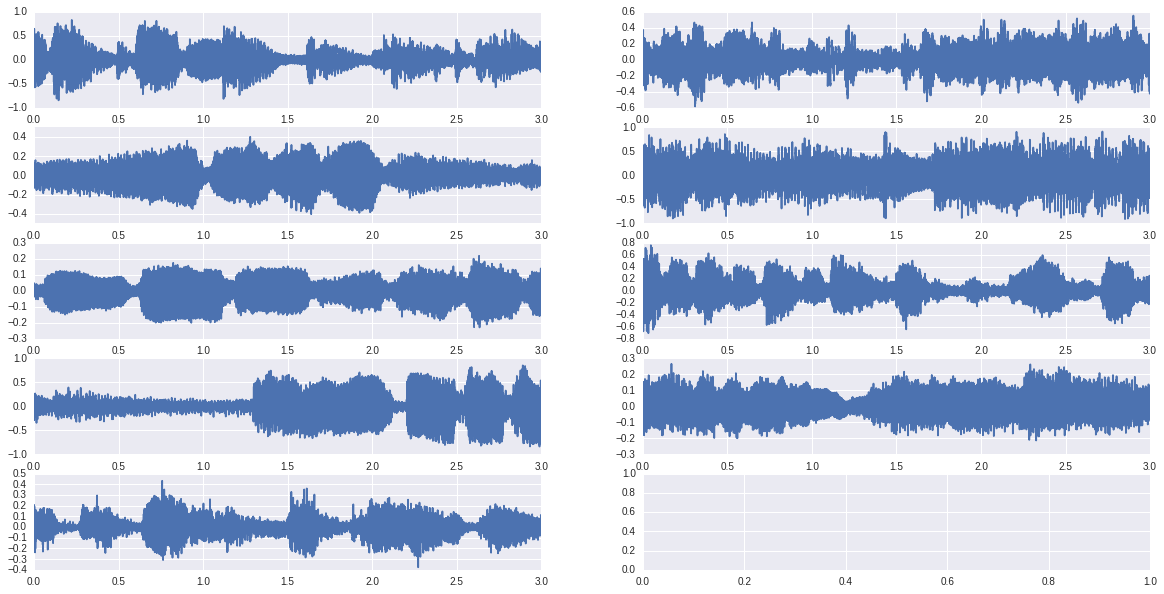

In [13]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(20, 10))
axlist = [x for ax in axes for x in ax]

for audio, ax in zip(tru, axlist):
    ax.plot(timeline, audio)
    
plt.show()

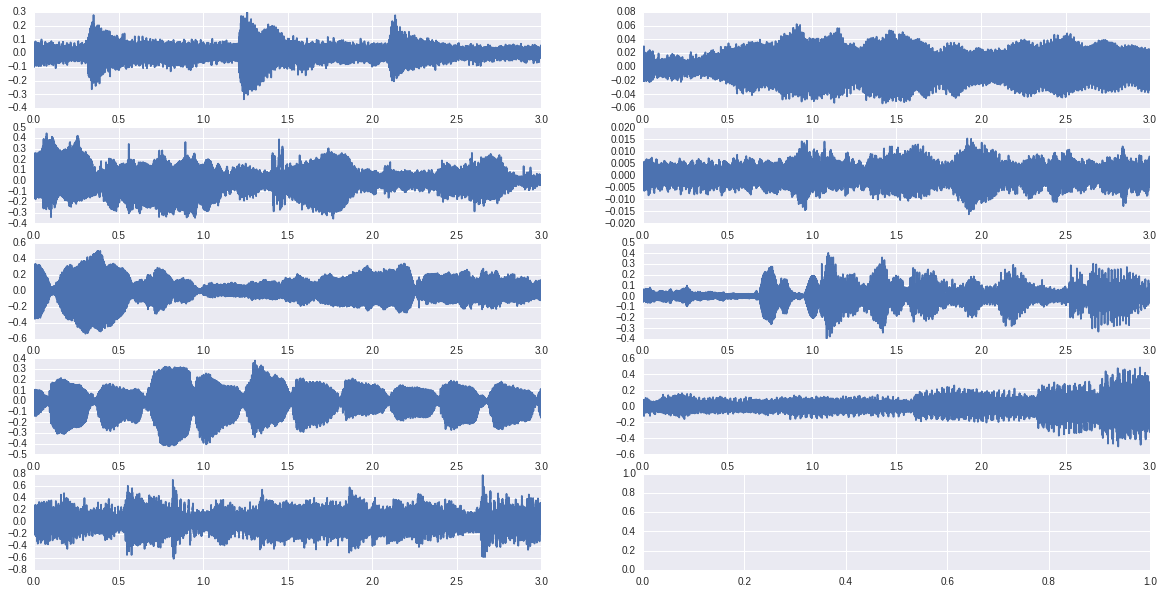

In [14]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(20, 10))
axlist = [x for ax in axes for x in ax]

for audio, ax in zip(vio, axlist):
    ax.plot(timeline, audio)
    
plt.show()

Let's look at the features we can extract directly from the waveform using Essentia algorithms. The first to look at is ZeroCrossingRate.

In [15]:
zcr = ZeroCrossingRate()
zcrs = []
labels = []
zc_means = []
zc_stds = []
for audios, label in zip([cel, cla, flu, gac, gel, org, pia, sax, tru, vio],
                         range(len(list_of_inst))):
    tmp = []
    for audio in audios:
        tmp_zcr = zcr(audio)
        zcrs.append(tmp_zcr)
        tmp.append(tmp_zcr)
    labels.append([label] * len(audios))
    zc_means.append(np.mean(tmp))
    zc_stds.append(np.std(tmp))
    
labels = [elem for subarr in labels for elem in subarr]

In [16]:
for meanv, err, label in zip(zc_means, 100 * np.array(zc_stds) / np.array(zc_means), range(len(list_of_inst))):
    print 'For label %d the mean ZCR is %f with %.1f percent error' % (label, meanv, err)

For label 0 the mean ZCR is 0.036585 with 54.8 percent error
For label 1 the mean ZCR is 0.047839 with 50.0 percent error
For label 2 the mean ZCR is 0.043009 with 38.8 percent error
For label 3 the mean ZCR is 0.033596 with 42.5 percent error
For label 4 the mean ZCR is 0.044694 with 43.4 percent error
For label 5 the mean ZCR is 0.041392 with 66.7 percent error
For label 6 the mean ZCR is 0.045127 with 34.2 percent error
For label 7 the mean ZCR is 0.045777 with 80.7 percent error
For label 8 the mean ZCR is 0.052442 with 28.1 percent error
For label 9 the mean ZCR is 0.049001 with 45.2 percent error


The second waveform-related feature to extract is Energy.

In [17]:
energy = Energy()
energies = []
en_means = []
en_stds = []

for audios in [cel, cla, flu, gac, gel, org, pia, sax, tru, vio]:
    tmp = []
    for audio in audios:
        tmp_en = energy(audio)
        energies.append(tmp_en)
        tmp.append(tmp_en)
    en_means.append(np.mean(tmp))
    en_stds.append(np.std(tmp))

In [18]:
for meanv, err, label in zip(en_means, 100 * np.array(en_stds) / np.array(en_means), range(len(list_of_inst))):
    print 'For label %d the mean Energy is %f with %.1f percent error' % (label, meanv, err)

For label 0 the mean Energy is 994.204708 with 1.3 percent error
For label 1 the mean Energy is 957.344372 with 0.7 percent error
For label 2 the mean Energy is 1644.930338 with 1.1 percent error
For label 3 the mean Energy is 1005.629658 with 1.3 percent error
For label 4 the mean Energy is 2872.220318 with 1.0 percent error
For label 5 the mean Energy is 1835.774141 with 0.8 percent error
For label 6 the mean Energy is 1485.440705 with 1.0 percent error
For label 7 the mean Energy is 1513.791721 with 1.2 percent error
For label 8 the mean Energy is 2267.358253 with 0.9 percent error
For label 9 the mean Energy is 965.199482 with 0.8 percent error


Moving to spectral characteristics. Having selected subjectively the most common instances of each musical instrument, let's plot their spectrograms using ```matplotlib```'s ```specgram```. It divides the array into overlapping windows and calculates the FFT of each, then plots.

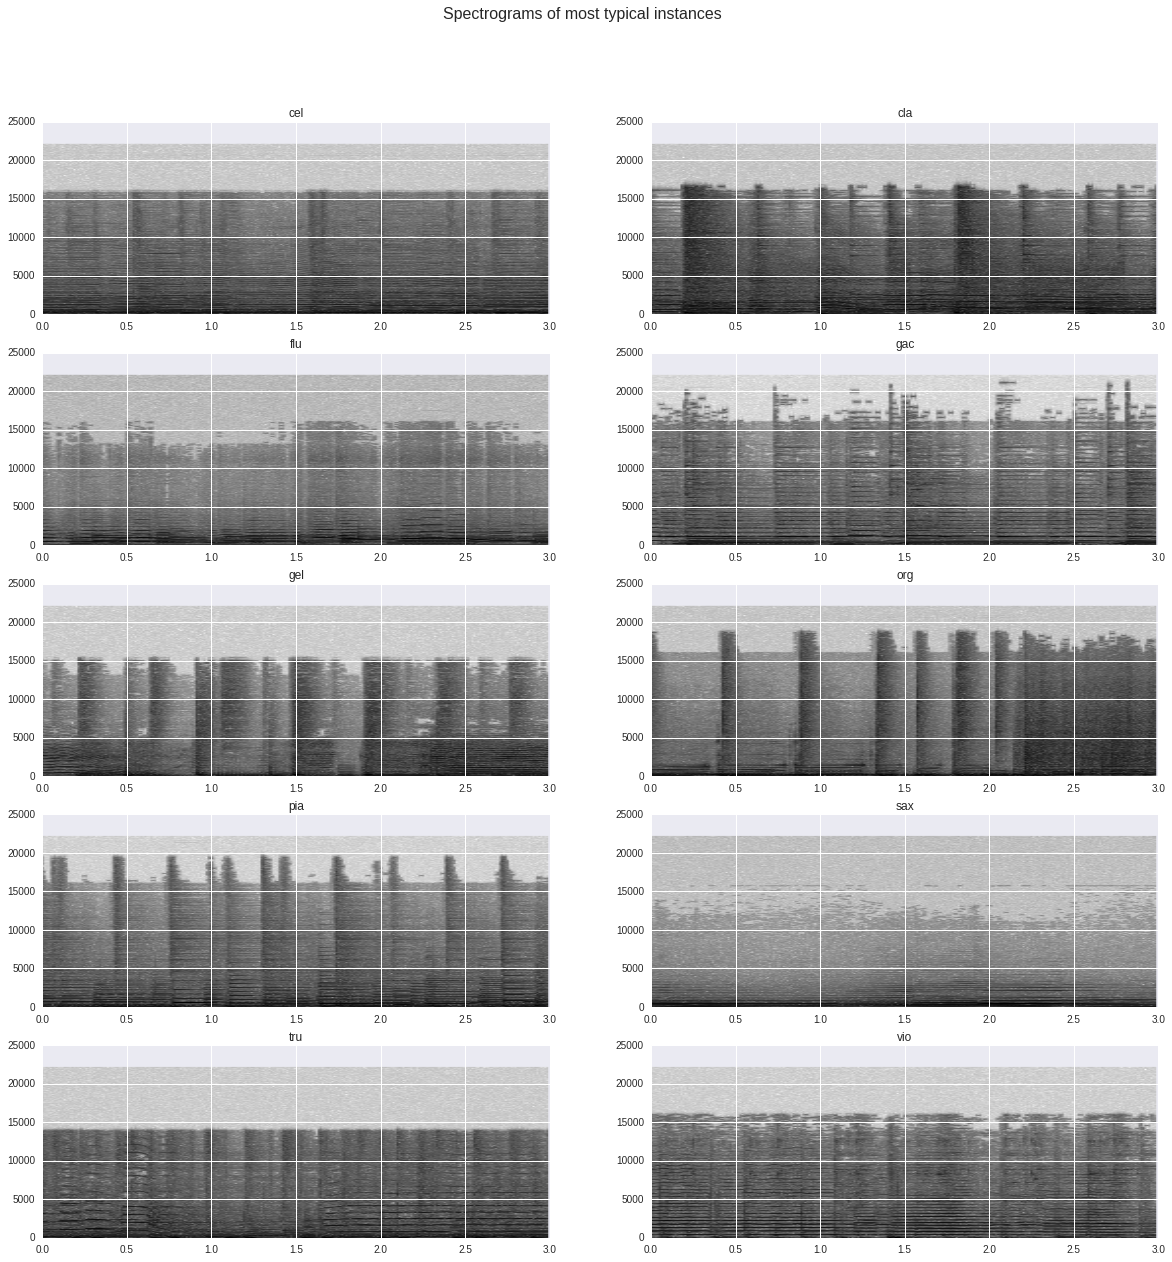

In [19]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(20, 20))
axlist = [x for ax in axes for x in ax]
chosen = [cel[4], cla[2], flu[6], gac[3], gel[7], org[1], pia[5], sax[2], tru[1], vio[2]]

for audio, ax, title in zip(chosen, axlist, list_of_inst):
    ax.specgram(audio, NFFT=1024, Fs=fr, noverlap=512)
    ax.set_title(title)
    
plt.suptitle('Spectrograms of most typical instances', size=16)
plt.show()

From pior analysis we can see that some instruments (like sax) can be quite accurately distinguished by their FFT only. We won't rely on that and shall use more of Essentia spectral algorithms.

In [20]:
spectrum = Spectrum()

scel = [spectrum(x[:-1]) for x in cel]
scla = [spectrum(x[:-1]) for x in cla]
sflu = [spectrum(x[:-1]) for x in flu]
sgac = [spectrum(x[:-1]) for x in gac]
sgel = [spectrum(x[:-1]) for x in gel]
sorg = [spectrum(x[:-1]) for x in org]
spia = [spectrum(x[:-1]) for x in pia]
ssax = [spectrum(x[:-1]) for x in sax]
stru = [spectrum(x[:-1]) for x in tru]
svio = [spectrum(x[:-1]) for x in vio]

In [21]:
centroid = Centroid()

centroids = []
cr_means = []
cr_stds = []

for audios in [scel, scla, sflu, sgac, sgel, sorg, spia, ssax, stru, svio]:
    tmp = []
    for audio in audios:
        tmp_cr = centroid(audio)
        centroids.append(tmp_cr)
        tmp.append(tmp_cr)
    cr_means.append(np.mean(tmp))
    cr_stds.append(np.std(tmp))

In [22]:
for meanv, err, label in zip(cr_means, 100 * np.array(cr_stds) / np.array(cr_means), range(len(list_of_inst))):
    print 'For label %d the mean Centroid is %f with %.1f percent error' % (label, meanv, err)

For label 0 the mean Centroid is 0.086755 with 23.5 percent error
For label 1 the mean Centroid is 0.113757 with 43.9 percent error
For label 2 the mean Centroid is 0.107672 with 55.4 percent error
For label 3 the mean Centroid is 0.100263 with 49.3 percent error
For label 4 the mean Centroid is 0.110569 with 40.7 percent error
For label 5 the mean Centroid is 0.136337 with 42.6 percent error
For label 6 the mean Centroid is 0.100952 with 42.7 percent error
For label 7 the mean Centroid is 0.098099 with 68.6 percent error
For label 8 the mean Centroid is 0.106267 with 38.7 percent error
For label 9 the mean Centroid is 0.102421 with 36.2 percent error


Supposing we also know about distribution shape, let's build a small example of classifying using all these features.

In [28]:
window = Windowing()
cm = CentralMoments()
dshape = DistributionShape()

def get_features(audio, fr = 44100., fs = 0.2):
    frame = audio[:int(fr * fs)]
    spec = spectrum(window(frame))
    res = [zcr(frame), energy(frame), centroid(spec)]
    res.extend(dshape(cm(spec)))
    return res

In [29]:
feature_table = []

for audios, label in zip([cel, cla, flu, gac, gel, org, pia, sax, tru, vio],
                         range(len(list_of_inst))):
    for audio in audios:
        feature_table.append(get_features(audio))
        
print np.asmatrix(feature_table)[:2]

[[  7.32426271e-02   2.85427570e-01   9.04893801e-02   1.19456239e-02
    2.77178478e+00   1.04146690e+01]
 [  1.46258501e-02   1.11271797e+02   4.13405709e-02   8.19700398e-03
    5.40536594e+00   3.42969208e+01]]


In [33]:
general = [[0] * len(cel) + [1] * (len(cla) + len(flu)) +
           [0] * (len(gac) + len(gel)) + [1] * len(org) + [2] * len(pia)
           + [1] * (len(sax) + len(tru)) + [0] * len(vio)]

general = [elem for subarr in general for elem in subarr]

In [34]:
dataset = pd.DataFrame.from_records(feature_table,
                                    columns = ['ZCR', 'Energy', 'Centroid', 'Variance', 'Skewness', 'Kurtosis'])
dataset['Label'] = labels
dataset['Generalized'] = general

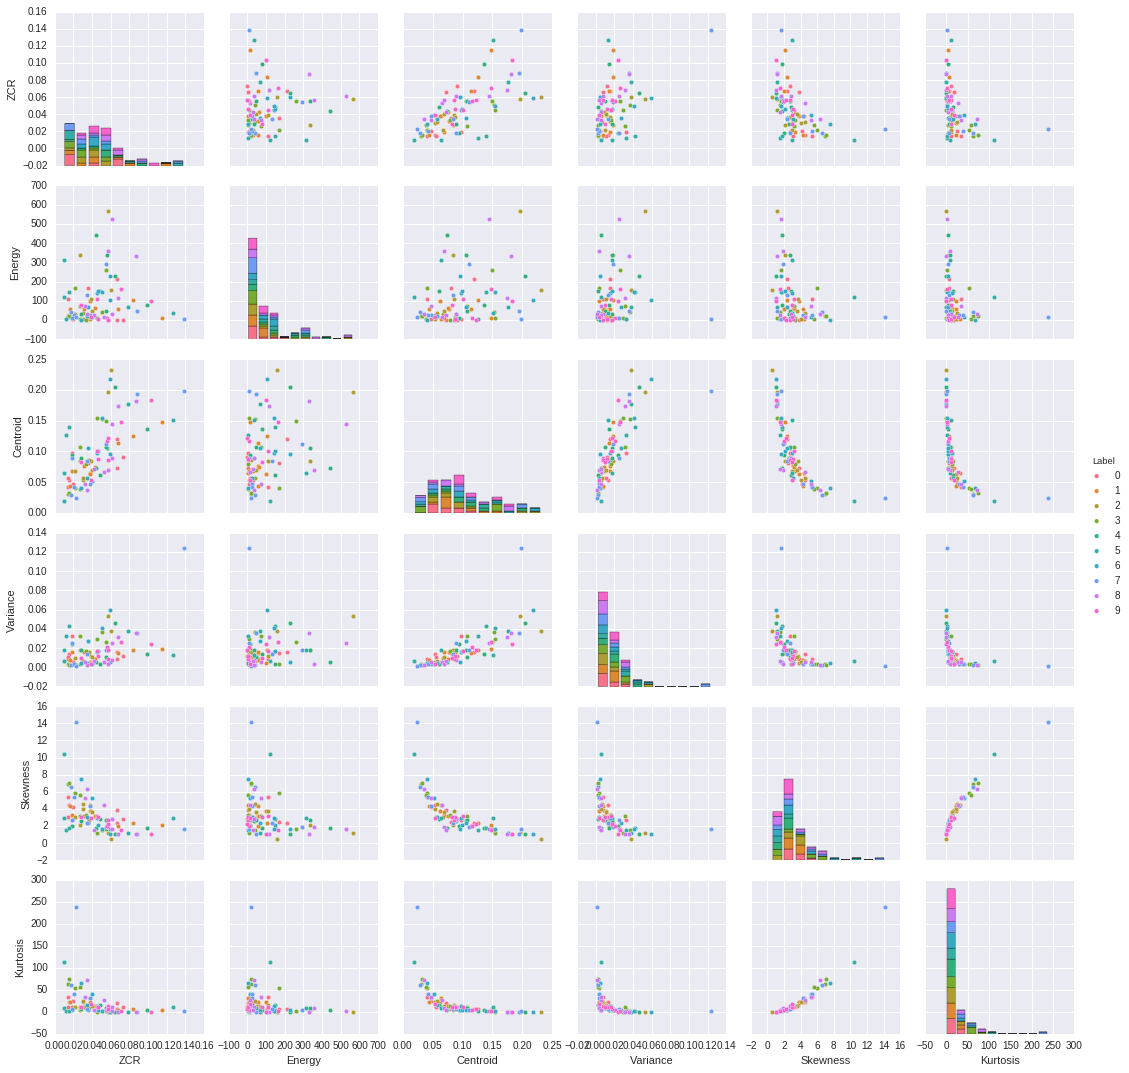

In [37]:
sns.pairplot(dataset, hue = 'Label', vars = ['ZCR', 'Energy', 'Centroid', 'Variance', 'Skewness', 'Kurtosis'])

What's next? Add more data. Add FFT and connected features. Fit a RandomForest.